In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:

# Specify the base URL and the endpoint for the Download function
base_url = "https://datasafe-h5afbhf4gwctabaa.z01.azurefd.net/api/"
endpoint = "Download/TOP/rep_imm/data"

# Concatenate the base URL and the endpoint
url = base_url + endpoint

response = requests.get(url)
if response.status_code == 200:
    df = pd.read_excel(response.content)
    #df.to_csv('rep_ctis1_data.csv')
else:
    # If the GET request is not successful, print the status code
    print("Failed to download data: status code", response.status_code)


In [23]:
def clean_df(df):
    columns_to_drop = [
        'estimate',
        'se',
        'ci_lb',
        'ci_ub',
        'indicator_scale',
        'update',
        'dataset_id'
    ]
    df = df.drop(columns=columns_to_drop)
    return df

In [24]:
clean_df(df)

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,population,flag,setting_average,iso3,favourable_indicator,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2022,regcode
0,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Age (2 groups) (15-49),15-19 years,NaN,Not available. . Note - Age refers to mother's...,62.889023,AFG,1,0,0,0,Eastern Mediterranean,Low income,NaN
1,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Age (2 groups) (15-49),20-49 years,NaN,Not available. . Note - Age refers to mother's...,62.889023,AFG,1,0,0,1,Eastern Mediterranean,Low income,NaN
2,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Economic status (wealth decile),Decile 1 (poorest),251.333344,Re-analysis of DHS/MICS/RHS data by the WHO Co...,62.889023,AFG,1,1,1,0,Eastern Mediterranean,Low income,NaN
3,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Economic status (wealth decile),Decile 10 (richest),232.994431,Re-analysis of DHS/MICS/RHS data by the WHO Co...,62.889023,AFG,1,1,10,0,Eastern Mediterranean,Low income,NaN
4,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Economic status (wealth decile),Decile 2,280.862427,Re-analysis of DHS/MICS/RHS data by the WHO Co...,62.889023,AFG,1,1,2,0,Eastern Mediterranean,Low income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254695,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,mashonaland west,177.246277,Re-analysis of DHS/MICS/RHS data by the WHO Co...,5.122864,ZWE,0,0,0,0,African,Lower middle income,5.0
254696,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,masvingo,144.236633,Re-analysis of DHS/MICS/RHS data by the WHO Co...,5.122864,ZWE,0,0,0,0,African,Lower middle income,9.0
254697,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,matabeleland north,65.529243,Re-analysis of DHS/MICS/RHS data by the WHO Co...,5.122864,ZWE,0,0,0,0,African,Lower middle income,6.0
254698,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,matabeleland south,66.772385,Re-analysis of DHS/MICS/RHS data by the WHO Co...,5.122864,ZWE,0,0,0,0,African,Lower middle income,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259769 entries, 0 to 259768
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            259769 non-null  int64  
 1   setting               259769 non-null  object 
 2   date                  259769 non-null  object 
 3   source                259769 non-null  object 
 4   indicator_abbr        259769 non-null  object 
 5   indicator_name        259769 non-null  object 
 6   dimension             259769 non-null  object 
 7   subgroup              259769 non-null  object 
 8   estimate              222881 non-null  float64
 9   se                    222881 non-null  float64
 10  ci_lb                 222881 non-null  float64
 11  ci_ub                 222881 non-null  float64
 12  population            222881 non-null  float64
 13  flag                  0 non-null       float64
 14  setting_average       259769 non-null  float64
 15  

In [ ]:
df.shape

(259769, 25)

In [17]:
df.iloc[0:20]
print(df.nunique())

setting                    110
date                        30
source                       6
indicator_abbr              18
indicator_name              18
dimension                    7
subgroup                  1526
estimate                170358
se                      169766
ci_lb                   173041
ci_ub                   172086
population               25596
flag                        12
setting_average           5694
iso3                       110
favourable_indicator         2
indicator_scale              1
ordered_dimension            2
subgroup_order              11
reference_subgroup           2
whoreg6                      6
wbincome2022                 4
regcode                     70
dataset_id                   1
update                       1
dtype: int64


<Axes: xlabel='indicator_name'>

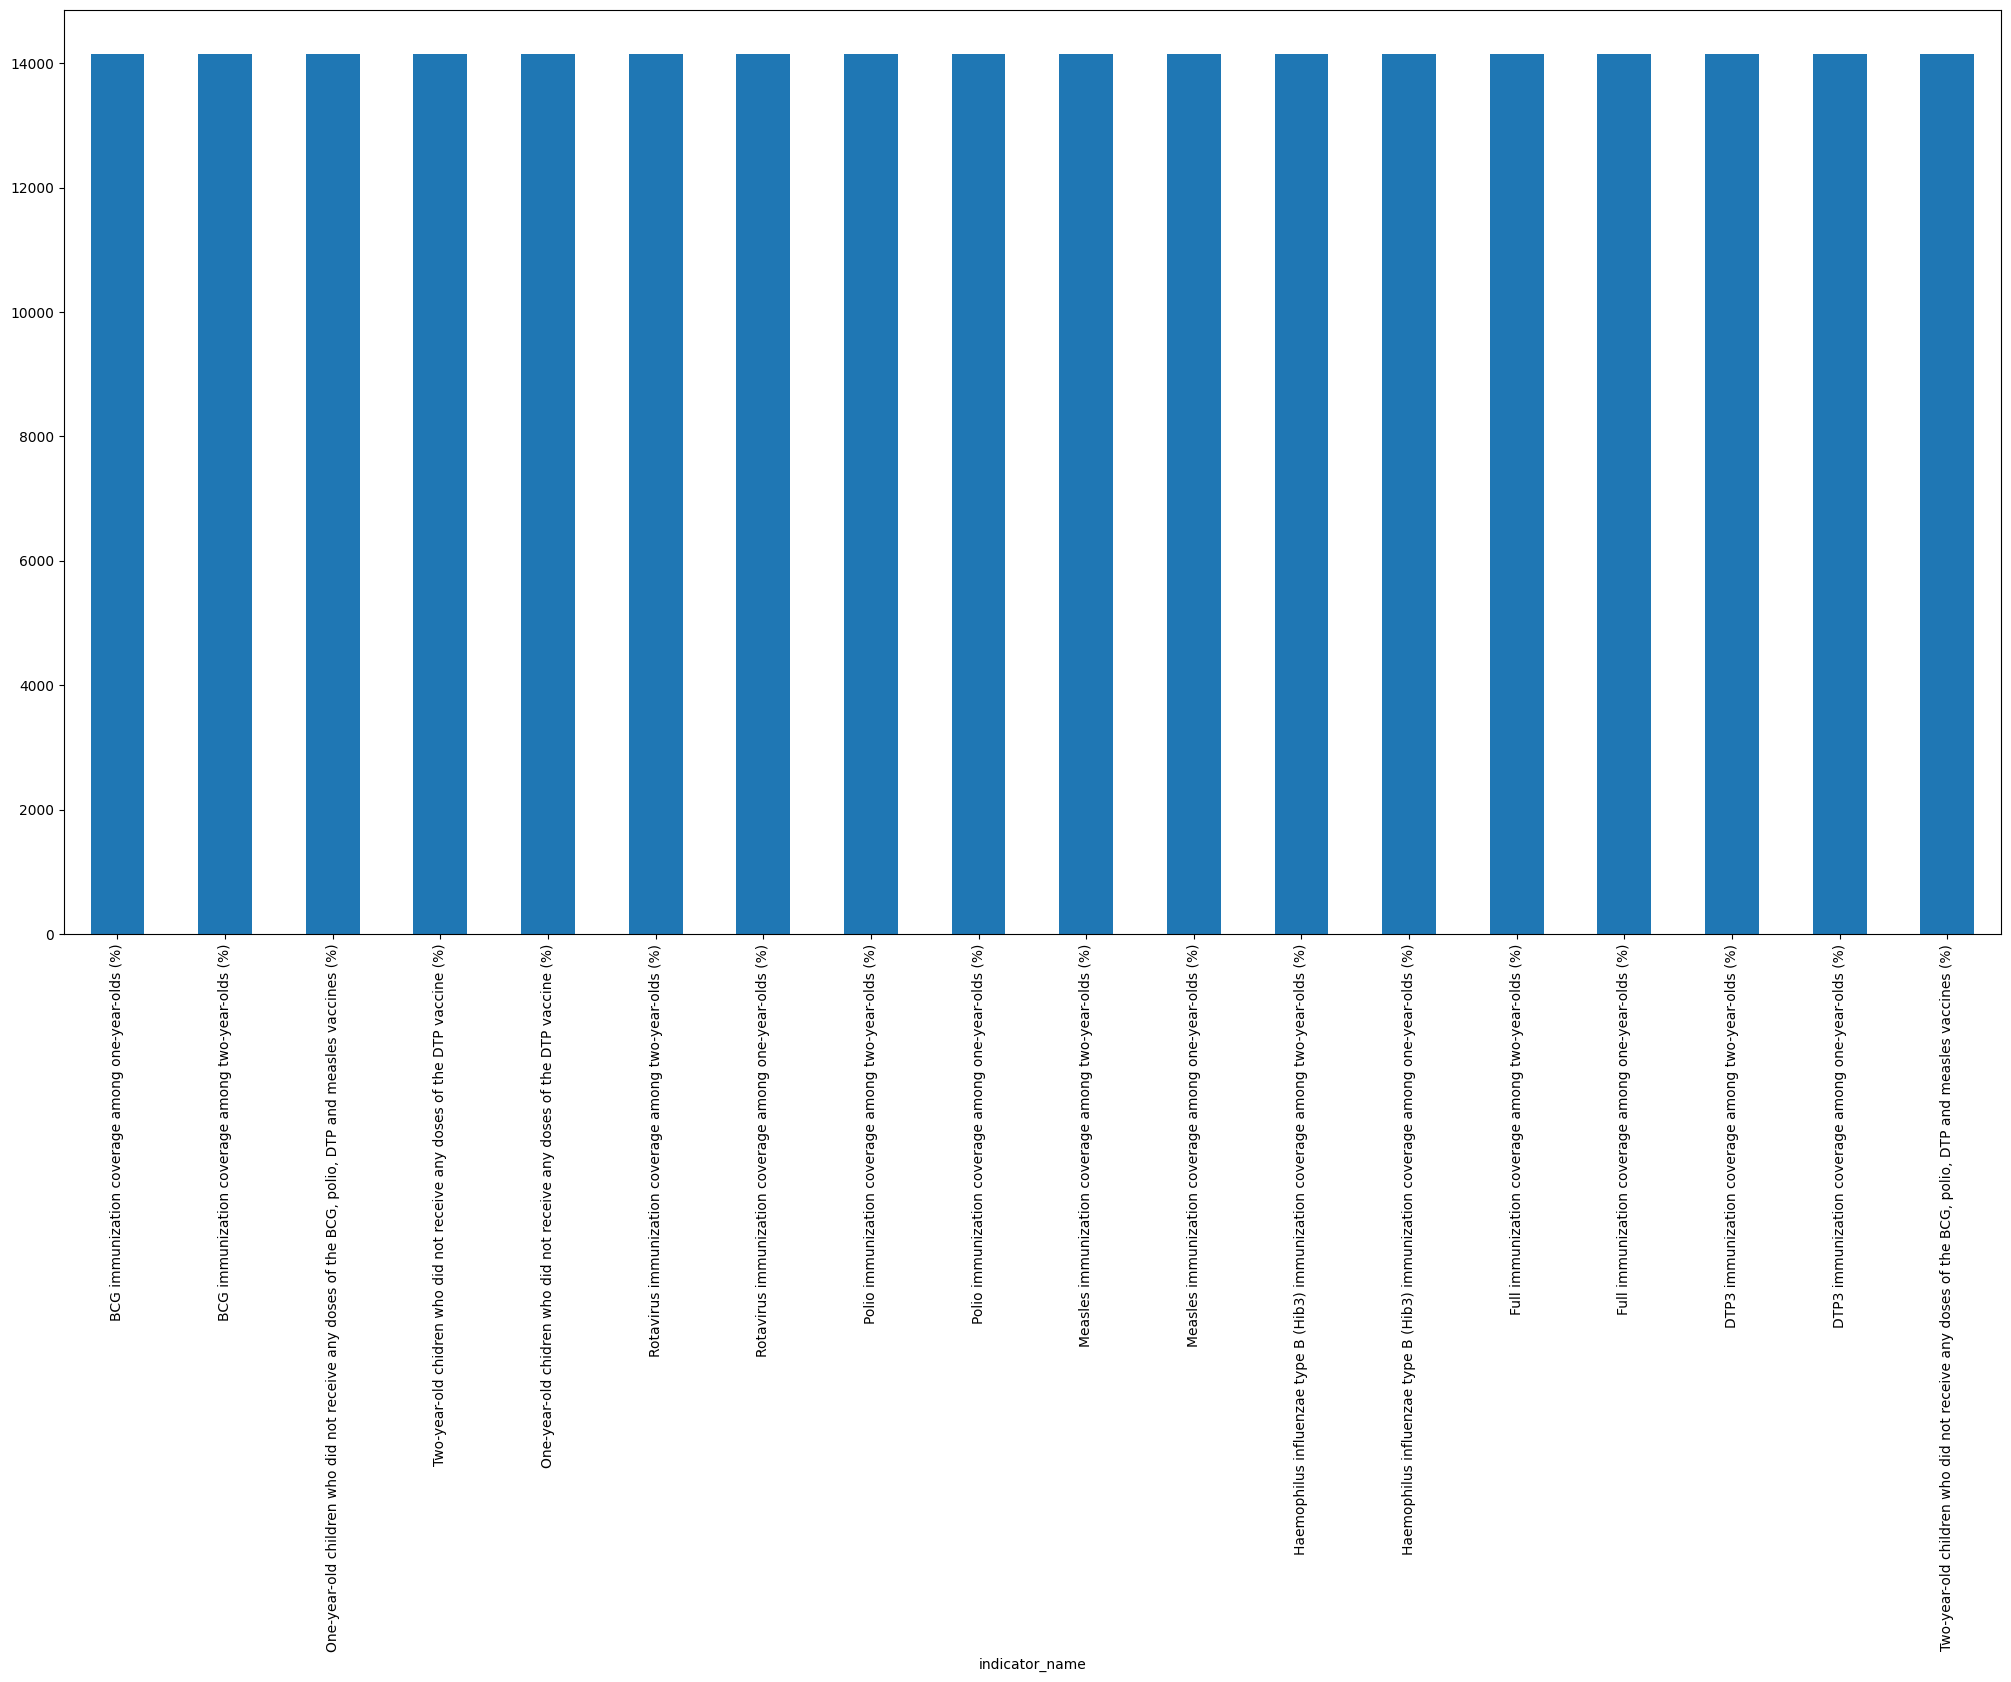

In [18]:
fig, ax= plt.subplots(figsize=(25,12))
df['indicator_name'].value_counts().plot(kind='bar',ax=ax)


In [20]:
mask= df['indicator_abbr'] == 'depressed_7d'
depress_df =df[mask].drop(columns='Unnamed: 0')

In [15]:
df

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,...,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2022,regcode,dataset_id,update
0,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Age (2 groups) (15-49),15-19 years,NaN,NaN,NaN,...,1,100,0,0,0,Eastern Mediterranean,Low income,NaN,rep_imm,16 June 2022
1,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Age (2 groups) (15-49),20-49 years,NaN,NaN,NaN,...,1,100,0,0,1,Eastern Mediterranean,Low income,NaN,rep_imm,16 June 2022
2,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Economic status (wealth decile),Decile 1 (poorest),56.021236,5.864519,44.377621,...,1,100,1,1,0,Eastern Mediterranean,Low income,NaN,rep_imm,16 June 2022
3,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Economic status (wealth decile),Decile 10 (richest),87.037323,2.247442,81.946373,...,1,100,1,10,0,Eastern Mediterranean,Low income,NaN,rep_imm,16 June 2022
4,Afghanistan,2011,MICS,vbcg,BCG immunization coverage among one-year-olds (%),Economic status (wealth decile),Decile 2,51.737640,4.940647,42.082516,...,1,100,1,2,0,Eastern Mediterranean,Low income,NaN,rep_imm,16 June 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254695,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,mashonaland west,7.259966,3.534714,2.713498,...,0,100,0,0,0,African,Lower middle income,5.0,rep_imm,16 June 2022
254696,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,masvingo,3.135534,2.671832,0.571024,...,0,100,0,0,0,African,Lower middle income,9.0,rep_imm,16 June 2022
254697,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,matabeleland north,3.413900,2.477011,0.800806,...,0,100,0,0,0,African,Lower middle income,6.0,rep_imm,16 June 2022
254698,Zimbabwe,2019,MICS,vzero24_35,Two-year-old children who did not receive any ...,Subnational region,matabeleland south,2.029853,1.382051,0.525750,...,0,100,0,0,0,African,Lower middle income,7.0,rep_imm,16 June 2022


In [23]:
depress_df['indicator_name']

16        Felt depressed for most or all of the past 7 d...
17        Felt depressed for most or all of the past 7 d...
18        Felt depressed for most or all of the past 7 d...
19        Felt depressed for most or all of the past 7 d...
20        Felt depressed for most or all of the past 7 d...
                                ...                        
259706    Felt depressed for most or all of the past 7 d...
259707    Felt depressed for most or all of the past 7 d...
259708    Felt depressed for most or all of the past 7 d...
259709    Felt depressed for most or all of the past 7 d...
259710    Felt depressed for most or all of the past 7 d...
Name: indicator_name, Length: 35991, dtype: object

<AxesSubplot: >

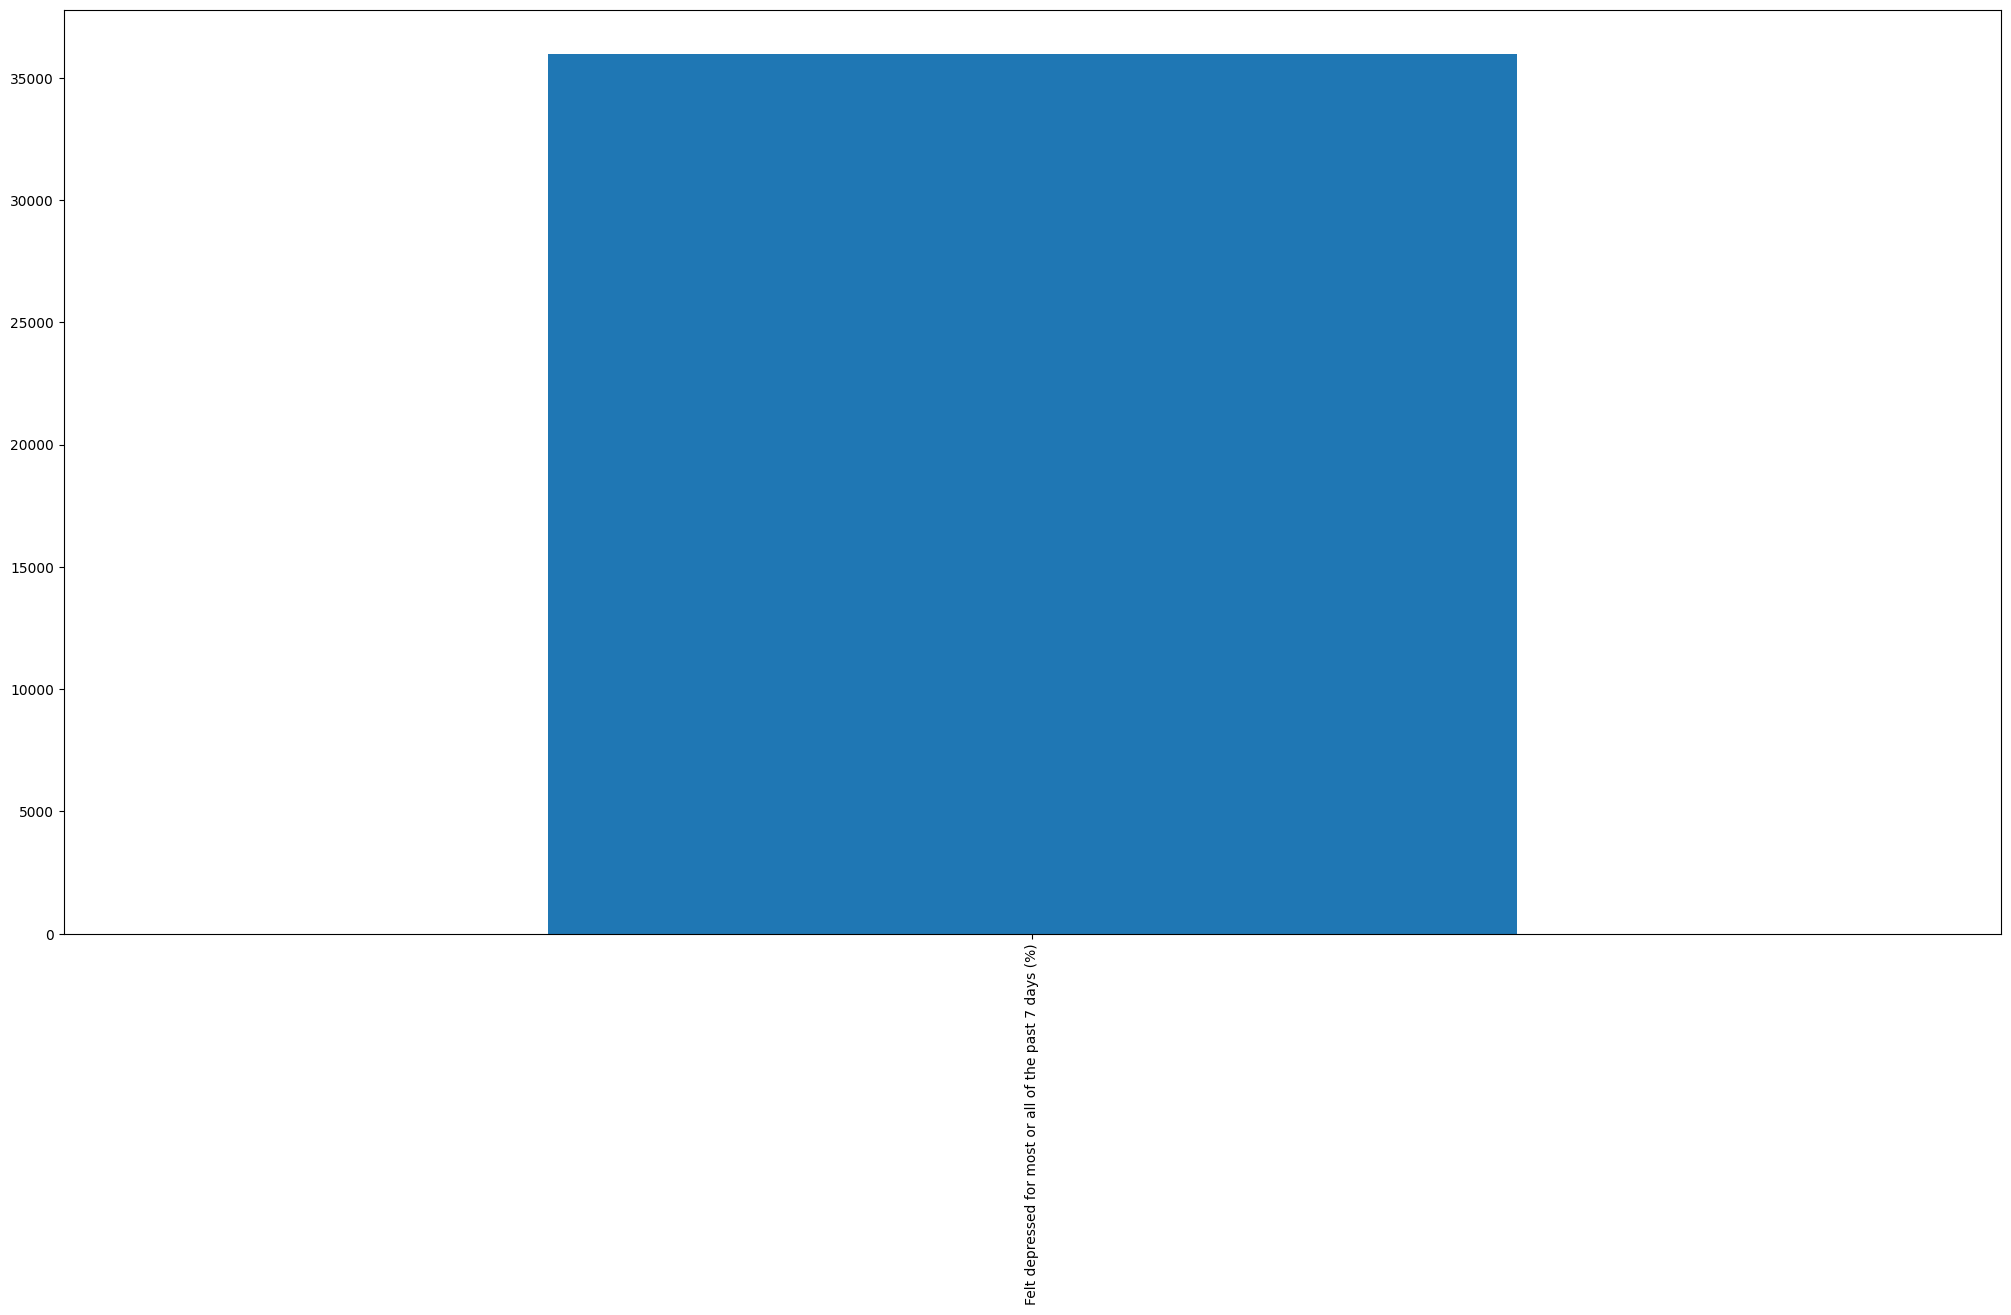

In [24]:
fig, ax= plt.subplots(figsize=(25,12))
depress_df['indicator_name'].value_counts().plot(kind='bar',ax=ax)
